In [1]:
%matplotlib inline                      

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import misc

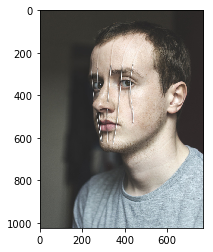

In [2]:
pic_face = misc.imread('/home/slou/Documents/M2/semestre1/ML_project/pictures_train/1.jpg')
type(pic_face)      
pic_face.shape, pic_face.dtype
plt.imshow(pic_face)

Features :
    background impact : 
    angle impact :
        given by angle feature
    position impact :
        using rule of the third, each picture split in 9 cases according to their size, we could use each of this case as a feature. Use the face detection and position of the face features to create another feature to say in which cases it is. Try of this after
    sharpness impact : determining sharpnesse using contrast ?
    exposure impact : 
    expression impact : using the expression feature but maybe need to compute with other feature such as colors (colorful = joy ?)
    
    
    
    Data features are given in % not in absolute

In [3]:
pic_features = pd.read_csv('/home/slou/Documents/M2/semestre1/ML_project/facial_features_train.csv')
result = pd.read_csv('/home/slou/Documents/M2/semestre1/ML_project/output_train.csv', sep =";")
pic_features.iloc[0]

ID                                           1
detection score                        0.98914
x0                                     0.28637
y0                                    0.194149
width                                   0.5866
height                                0.437185
left_eye_x                            0.352257
left_eye_y                            0.342082
right_eye_x                           0.528909
right_eye_y                           0.334524
left_of_left_eyebrow_x                0.301341
left_of_left_eyebrow_y                0.300882
right_of_left_eyebrow_x                0.36293
right_of_left_eyebrow_y               0.296558
left_of_right_eyebrow_x               0.446798
left_of_right_eyebrow_y               0.294219
right_of_right_eyebrow_x              0.607825
right_of_right_eyebrow_y              0.302685
midpoint_between_eyes_x               0.400697
midpoint_between_eyes_y               0.329646
nose_tip_x                            0.343814
nose_tip_y   

In [4]:
result.iloc[1026]

ID        1027
TARGET      17
Name: 1026, dtype: int64

In [5]:
x_selection_position = pic_features.ix[:,'x0':'right_eye_y']
y_position_impact = pic_features[["position_impact_p", "position_impact_n"]].sum(axis=1)

In [6]:
pic_features["angle_impact_n"].unique()

array([ 0.        , -0.16666667, -0.5       , -0.33333333, -0.14285714,
       -0.83333333, -0.66666667, -0.71428571, -0.2       , -1.        ,
       -0.28571429, -0.4       , -0.57142857, -0.42857143, -0.125     ,
       -0.25      , -0.375     , -0.6       ])

In [7]:
#compute middle of face 
x_selection_position['middle_x'] = x_selection_position['x0'] + x_selection_position['width']/2
x_selection_position['middle_y'] = x_selection_position['y0'] + x_selection_position['height']/2

#compute distance from the first third point
#sqrt((x2 - x1)**2 + (y2 - y1)**2 )
#math.hypot(x2 - x1, y2 - y1)

#Line distance
x_selection_position['distance_x_a'] = abs(x_selection_position['middle_x'] - 0.33)
x_selection_position['distance_y_a'] = abs(x_selection_position['middle_y'] - 0.33)
x_selection_position['distance_x_b'] = abs(x_selection_position['middle_x'] - 0.67)
x_selection_position['distance_y_c'] = abs(x_selection_position['middle_y'] - 0.67)

#Eyes position distance to the top third
x_selection_position['left_eye_top_y'] = abs(x_selection_position['left_eye_y'] - 0.33)
x_selection_position['right_eye_top_y'] = abs(x_selection_position['right_eye_y'] - 0.33)


list(x_selection_position)

['x0',
 'y0',
 'width',
 'height',
 'left_eye_x',
 'left_eye_y',
 'right_eye_x',
 'right_eye_y',
 'middle_x',
 'middle_y',
 'distance_x_a',
 'distance_y_a',
 'distance_x_b',
 'distance_y_c',
 'left_eye_top_y',
 'right_eye_top_y']

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_selection_position, y_position_impact, train_size=0.8, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(x_selection_position, result['TARGET'], train_size=0.8, random_state=0)
print("Nb d'échantillons d'apprentissage :  {}".format(X_train.shape[0]))
print("Nb d'échantillons de validation :    {}".format(X_test.shape[0]))

Nb d'échantillons d'apprentissage :  8000
Nb d'échantillons de validation :    2000


/home/slou/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
               
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)

# Chargement d'une mesure standard de performance
from sklearn.metrics import mean_squared_error


# accuracy : mean square error
print("Mean square : ", mean_squared_error(y_test, y_pred))

Mean square :  0.0371435602805


(array([   18.,    16.,    28.,    71.,   203.,  1480.,   120.,    40.,
           17.,     7.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

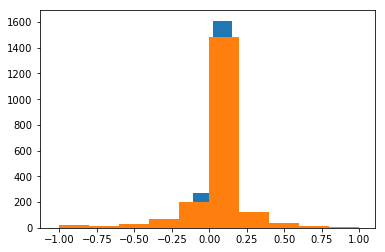

In [15]:
plt.hist(y_pred)
plt.hist(y_test)

In [16]:
test = y_position_impact[(y_position_impact <= -0.5)]
test.head()

43    -0.714286
51    -0.500000
64    -1.000000
125   -0.500000
132   -0.500000
dtype: float64

In [17]:
test2 = result[(result['TARGET'] >= 24)]
test2.head()

ID  TARGET
2129  2130      24
2768  2769      24
6304  6305      24
6781  6782      24
9111  9112      24

In [9]:
from sklearn.cross_validation import train_test_split

x_selection_angle = pic_features.ix[:,'pan angle':'roll angle']

x_selection_angle['middle_x'] = (pic_features['x0'] + pic_features['width'])/2
x_selection_angle['middle_y'] = (pic_features['y0'] + pic_features['height'])/2
x_selection_angle['nose_tip_x'] = pic_features['nose_tip_x']
x_selection_angle['nose_tip_y'] = pic_features['nose_tip_y']
x_selection_angle['nose_left_eye_dist'] = abs(pic_features['nose_tip_x'] - pic_features['left_eye_pupil_x'])
x_selection_angle['nose_right_eye_dist'] = abs(pic_features['nose_tip_x'] - pic_features['right_eye_pupil_x'])
x_selection_angle['mouth_eye'] = abs(pic_features['mouth_center_x'] - pic_features['midpoint_between_eyes_x'])



y_angle_impact = pic_features["angle_impact_n"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_selection_angle, y_angle_impact, train_size=0.8, random_state=0)
X_train2.head()


pan angle  roll angle  middle_x  middle_y  nose_tip_x  nose_tip_y  \
7389   0.320420    1.059437  0.341958  0.286051    0.543975    0.483185   
9275  12.185034    1.336007  0.247659  0.133423    0.384551    0.198556   
2995  33.365295    6.042064  0.323291  0.254619    0.520080    0.411934   
5316  57.479897    3.976148  0.368225  0.386593    0.675414    0.495695   
356   13.216852    3.429039  0.332959  0.357690    0.517975    0.522908   

      nose_left_eye_dist  nose_right_eye_dist  mouth_eye  
7389            0.057943             0.059628   0.000510  
9275            0.064927             0.045165   0.006050  
2995            0.099042             0.037324   0.020708  
5316            0.195748             0.026234   0.026470  
356             0.086408             0.059099   0.014374

In [19]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=10, gamma=1e-4)
svr_rbf.fit(X_train2, y_train2)
y_pred2 = svr_rbf.predict(X_test2)


from sklearn.metrics import mean_squared_error

# accuracy : mean square error
print("Mean square : ", mean_squared_error(y_test2, y_pred2))

Mean square :  0.0154123615612


(array([  1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.50000000e+01,   0.00000000e+00,   2.60000000e+01,
          6.80000000e+01,   1.00000000e+01,   2.45000000e+02,
          1.63300000e+03]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 10 Patch objects>)

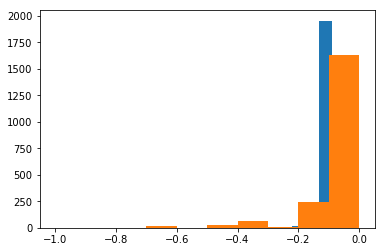

In [22]:
plt.hist(y_pred2)
plt.hist(y_test2)

In [18]:
train = pd.read_csv('/home/slou/Documents/M2/semestre1/ML_project/dataframe.csv')

In [19]:
train.head()

Unnamed: 0    ID    blurr_tot  blurr_face  blurr_background      d_p1  \
0           0  5976  1743.596281  147.875463       1119.294495  0.198620   
1           1   812   116.822574  191.002383         54.601949  0.119405   
2           2  5277    40.754876   46.903435         37.887703  0.155853   
3           3   227   149.655367   63.048712        237.102533  0.318423   
4           4  5764   285.102605  147.697256        314.675108  0.310201   

       d_p2      d_p3      d_p4      d_l1       ...        hsv_face_v_m  \
0  0.215208  0.275282  0.262518  0.156370       ...          115.155175   
1  0.297001  0.519344  0.442455  0.055739       ...          142.051775   
2  0.341554  0.354362  0.182219  0.028114       ...          139.897980   
3  0.179870  0.176561  0.316565  0.270226       ...          139.811310   
4  0.253186  0.161391  0.241180  0.214848       ...          103.251145   

   hsv_face_h_std  hsv_face_s_std  hsv_face_v_std  hsv_back_h_m  hsv_back_s_m  \
0       31.208942       55.335074       61.128541     41.836207     30.062053   
1       38.218802       51.237852       48.863728     43.082093    104.732151   
2       45.651516       49.478375       48.945511     59.870900     30.359972   
3       26.111468       27.782760       36.384501     84.176202     75.421772   
4        0.000000        0.000000       65.972462      0.000000      0.000000   

   hsv_back_v_m  hsv_back_h_std  hsv_back_s_std  hsv_back_v_std  
0     85.451794       55.343050       48.860791       76.560936  
1    117.105695       53.701751       66.685826       64.285221  
2    160.154835       57.008190       45.935271       92.327021  
3    147.568104       43.076131       37.359325       63.953503  
4     98.189722        0.000000        0.000000       69.610554  

[5 rows x 35 columns]

In [40]:
#x_selection_background = train.drop(train.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], axis=1)
x_selection_sharpness = pd.DataFrame(columns=('blurr_face', 'blurr_background'))
#x_selection_background['blurr_tot'] = train['blurr_tot']
x_selection_sharpness['blurr_face'] = train['blurr_face']
x_selection_sharpness['blurr_background'] = train['blurr_background']

list(x_selection_sharpness)       

['blurr_face', 'blurr_background']

In [46]:
y_sharpness_impact = pic_features["sharpness_impact_n"]
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_selection_sharpness, y_sharpness_impact, train_size=0.8, random_state=0)
X_train3.head()


blurr_face  blurr_background
7389  154.283774         73.554015
9275   68.411701         31.894881
2995  218.954911        125.815147
5316    9.480694         16.039619
356    23.250725         58.918417

In [47]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1)
svr_rbf.fit(X_train3, y_train3)
y_pred3 = svr_rbf.predict(X_test3)


from sklearn.metrics import mean_squared_error

# accuracy : mean square error
print("Mean square : ", mean_squared_error(y_test3, y_pred3))
from sklearn.metrics import mean_squared_error

Mean square :  0.0382291220061


In [52]:
x_selection_background = train.drop(train.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], axis=1)
#x_selection_background = pd.DataFrame(columns=('blurr_face', 'blurr_background'))
x_selection_background['blurr_face'] = train['blurr_face']
x_selection_background['blurr_background'] = train['blurr_background']

list(x_selection_background)

['blurr_tot',
 'brightness',
 'hsv_im_h_m',
 'hsv_im_s_m',
 'hsv_im_v_m',
 'hsv_im_h_std',
 'hsv_im_s_std',
 'hsv_im_v_std',
 'hsv_face_h_m',
 'hsv_face_s_m',
 'hsv_face_v_m',
 'hsv_face_h_std',
 'hsv_face_s_std',
 'hsv_face_v_std',
 'hsv_back_h_m',
 'hsv_back_s_m',
 'hsv_back_v_m',
 'hsv_back_h_std',
 'hsv_back_s_std',
 'hsv_back_v_std',
 'blurr_face',
 'blurr_background']

In [53]:
y_background_impact = pic_features["background_impact_n"]
X_train4, X_test4, y_train4, y_test4 = train_test_split(x_selection_background, y_background_impact, train_size=0.8, random_state=0)
X_train4.head()

blurr_tot  brightness  hsv_im_h_m  hsv_im_s_m  hsv_im_v_m  \
7389  117.920296  113.248008   63.384899   96.148212  135.177082   
9275   44.353077  136.674900   34.157389  118.454884  174.119010   
2995  139.010597   82.408957   33.836158  168.326977   99.883815   
5316   14.464545  130.399584   66.544989   48.804101  143.514062   
356    99.377061   99.051194   74.480460   82.346474  116.460720   

      hsv_im_h_std  hsv_im_s_std  hsv_im_v_std  hsv_face_h_m  hsv_face_s_m  \
7389     49.282015     46.878934     72.593319     40.337997     70.507808   
9275     56.745210     75.703857     65.976590     29.573019    110.992944   
2995     35.807068     52.326159     68.009474     19.719076    194.701775   
5316     55.276829     36.535380     67.444743     32.783860     86.345902   
356      44.439222     43.520942     62.561148     27.309002    109.386439   

            ...         hsv_face_s_std  hsv_face_v_std  hsv_back_h_m  \
7389        ...              32.603469       61.757573     65.273128   
9275        ...              64.528073       64.345631     37.314325   
2995        ...              27.636692       34.559695     35.182413   
5316        ...              23.984501       34.380396     77.711250   
356         ...              37.474053       48.254458     75.980684   

      hsv_back_s_m  hsv_back_v_m  hsv_back_h_std  hsv_back_s_std  \
7389     98.342339    132.956740       46.771977       47.273880   
9275    123.503230    170.264298       60.009199       81.924267   
2995    165.792024     99.699069       37.106212       53.432528   
5316     36.363929    157.307435       48.363366       31.072990   
356      81.409801    116.711450       43.591812       43.418668   

      hsv_back_v_std  blurr_face  blurr_background  
7389       72.999503  154.283774         73.554015  
9275       66.832458   68.411701         31.894881  
2995       70.406439  218.954911        125.815147  
5316       70.004200    9.480694         16.039619  
356        62.981163   23.250725         58.918417  

[5 rows x 22 columns]

In [54]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1)
svr_rbf.fit(X_train4, y_train4)
y_pred4 = svr_rbf.predict(X_test4)


from sklearn.metrics import mean_squared_error

# accuracy : mean square error
print("Mean square : ", mean_squared_error(y_test4, y_pred4))
from sklearn.metrics import mean_squared_error

Mean square :  0.0973574944245


In [62]:
background = pic_features
background['impact_n'] = pic_features['background_impact_n']
background['impact_p'] = pic_features['background_impact_p']


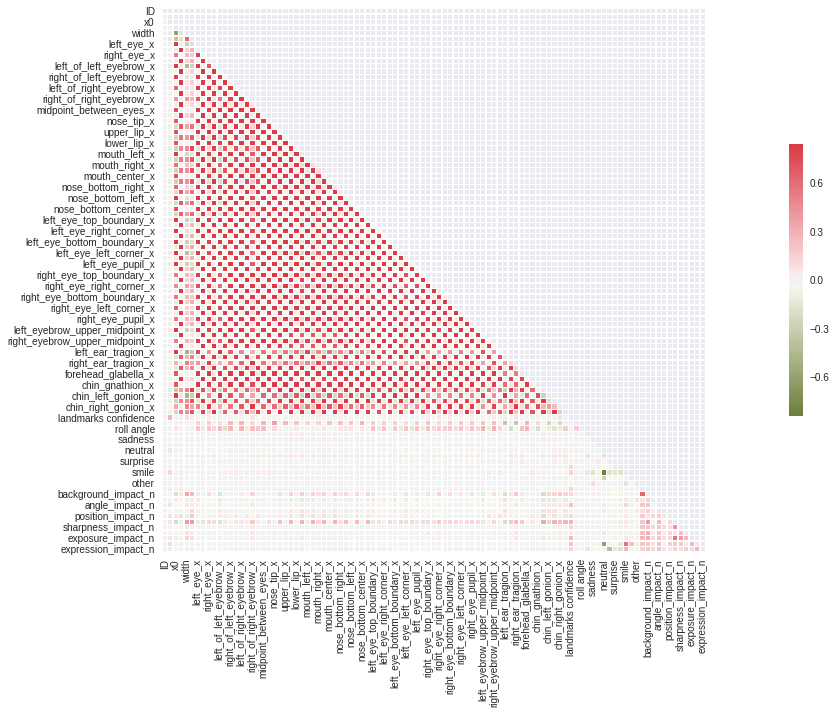

In [63]:
import seaborn as sns

# Generate a mask for the upper triangle
corr = background.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)

In [68]:
corr['background_impact_p'].sort_values(ascending=1)

height                           -0.062892
hard_to_tell                     -0.056817
grimace                          -0.056432
width                            -0.053021
chin_gnathion_y                  -0.035459
surprise                         -0.034234
lower_lip_y                      -0.029382
mouth_center_y                   -0.025352
mouth_right_y                    -0.024087
mouth_left_y                     -0.023951
chin_right_gonion_y              -0.023447
chin_left_gonion_y               -0.021696
laugh                            -0.021130
right_ear_tragion_x              -0.020841
upper_lip_y                      -0.020722
right_of_right_eyebrow_x         -0.019948
right_eye_right_corner_x         -0.018535
chin_right_gonion_x              -0.018427
right_eye_x                      -0.017437
right_eye_bottom_boundary_x      -0.017270
right_eyebrow_upper_midpoint_x   -0.016935
right_eye_pupil_x                -0.016573
right_eye_top_boundary_x         -0.016456
anger      